<a href="https://colab.research.google.com/github/fahizakaruppanthodi/AI-Powered-Movie-Recommender/blob/main/AI_Powered_Movie_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

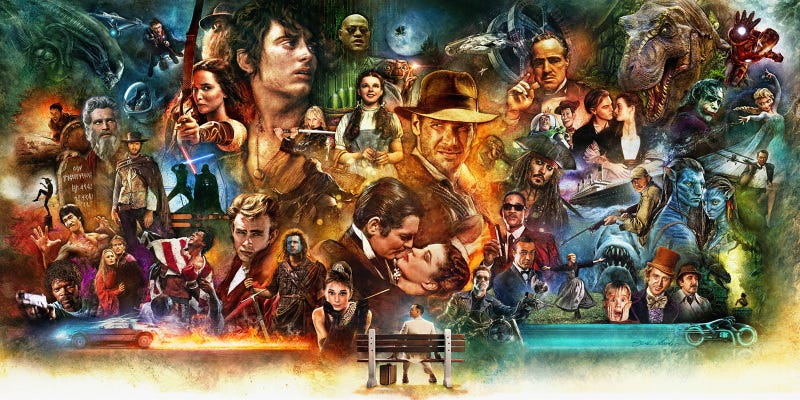

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/1_AioDCH3cwN6xgqzRU8IZdw.jpg",height=500,width=900))

In [ ]:
# import all necessary libraries
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# loading the data from the csv file to apandas dataframe
df = pd.read_csv('/content/movies.csv')
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [ ]:
# printing the first 5 rows of the dataframe
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
# number of rows and columns in the data frame
print("column count: ",df.shape[1])
print("Row count: ",df.shape[0])

column count:  24
Row count:  4803


In [ ]:
df.isna().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


In [ ]:
# selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
# replacing the null valuess with null string
for feature in selected_features:
   df[feature] = df[feature].fillna('')

In [ ]:
df.isna().sum()

,0
index,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0


In [ ]:
# combining all the 5 selected features
combined_features = df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']

In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)


In [ ]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

In [ ]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity.shape)

(4803, 4803)


In [ ]:
# getting the movie name from the user
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : avatar


In [ ]:
# creating a list with all the movie names given in the dataset
list_of_all_titles = df['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Avatar']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Avatar


In [ ]:
# finding the index of the movie with title
index_of_the_movie = df[df.title == close_match]['index'].values[0]
print(index_of_the_movie)

0


In [ ]:
# getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, np.float64(1.0)), (1, np.float64(0.07219486822992488)), (2, np.float64(0.037732999577179294)), (3, np.float64(0.012520204623868908)), (4, np.float64(0.10702574467235304)), (5, np.float64(0.07786899789424222)), (6, np.float64(0.008237143013608844)), (7, np.float64(0.03613473061484885)), (8, np.float64(0.02960930964063025)), (9, np.float64(0.026287167439951735)), (10, np.float64(0.09261074046755373)), (11, np.float64(0.012717759249124133)), (12, np.float64(0.02721736008310012)), (13, np.float64(0.029569752523347516)), (14, np.float64(0.06915925473724743)), (15, np.float64(0.019551594499309027)), (16, np.float64(0.034263405780616416)), (17, np.float64(0.02603656461429414)), (18, np.float64(0.05714759266672412)), (19, np.float64(0.0389505953521203)), (20, np.float64(0.03971480215415496)), (21, np.float64(0.01201480380565613)), (22, np.float64(0.030438694261989592)), (23, np.float64(0.045926535588179496)), (24, np.float64(0.04623989017965258)), (25, np.float64(0.04284926095950226)), (2

In [ ]:
len(similarity_score)

4803

In [ ]:
# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(0, np.float64(1.0)), (3158, np.float64(0.2494676630753241)), (2403, np.float64(0.24841462595906272)), (94, np.float64(0.24505931974059822)), (56, np.float64(0.20378069648285427)), (47, np.float64(0.20115287461144912)), (1053, np.float64(0.19702752258651424)), (838, np.float64(0.18017023369312363)), (3730, np.float64(0.1764624118531341)), (4593, np.float64(0.17448845797415172)), (239, np.float64(0.17441748680810656)), (1531, np.float64(0.1682605817219649)), (2696, np.float64(0.1650346025917652)), (812, np.float64(0.16062301907491794)), (643, np.float64(0.15644455512484967)), (4401, np.float64(0.15468923545220403)), (2198, np.float64(0.15217161971893786)), (770, np.float64(0.1502572672775349)), (1951, np.float64(0.14933372705282924)), (2229, np.float64(0.14661801285492254)), (1922, np.float64(0.14481974301913123)), (206, np.float64(0.14226144606175548)), (3208, np.float64(0.1401230206493547)), (1759, np.float64(0.13899056016968867)), (43, np.float64(0.1348209130228474)), (1473, np.floa

In [ ]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander


In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = df['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = df[df.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : avengers
Movies suggested for you : 

1 . The Avengers
2 . Avengers: Age of Ultron
3 . Captain America: The Winter Soldier
4 . Captain America: Civil War
5 . Iron Man 2
6 . Thor: The Dark World
7 . X-Men
8 . The Incredible Hulk
9 . X-Men: Apocalypse
10 . Ant-Man
11 . Thor
12 . X2
13 . X-Men: The Last Stand
14 . Deadpool
15 . X-Men: Days of Future Past
16 . Captain America: The First Avenger
17 . The Amazing Spider-Man 2
18 . The Image Revolution
19 . Iron Man
20 . Iron Man 3
21 . Man of Steel
22 . The Spirit
23 . Superman II
24 . X-Men: First Class
25 . Guardians of the Galaxy
26 . Batman v Superman: Dawn of Justice
27 . Serenity
28 . Spawn
29 . Teenage Mutant Ninja Turtles: Out of the Shadows
